In [1]:
import pandas as pd
import os
import json
import requests
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Seattle = pd.read_csv("Seattle.csv")

In [3]:
Seattle

,INDUSTRY,2015Number,2015Percent,2000Number,2000Percent,Unnamed: 5
0,"Agriculture, forestry, fishing and hunting, an...","1,642",0.40%,"1,103",0.3,NaN
1,Construction,"11,438",3.00%,"12,892",4.0,NaN
2,Manufacturing,"25,962",6.80%,"26,753",8.3,NaN
3,Wholesale trade,"7,432",1.90%,"10,471",3.3,NaN
4,Retail trade,"44,417",11.60%,"35,645",11.1,NaN
5,"Transportation and warehousing, and utilities","12,049",3.10%,"13,492",4.2,NaN
6,Information,"14,829",3.90%,"19,175",6.0,NaN
7,"Finance and insurance, and real estate and ren...","22,457",5.90%,"22,171",6.9,NaN
8,"Professional, scientific, and management, and ...","77,245",20.20%,"51,813",16.1,NaN
9,"Educational services, and health care and soci...","89,398",23.40%,"69,507",21.6,NaN


In [4]:
Seattle['15num'] = Seattle['2015Number'].str.replace(",", "").astype(float)

In [5]:
Seattle['00num'] = Seattle['2000Number'].str.replace(",", "").astype(float)

In [6]:
Seattle

,INDUSTRY,2015Number,2015Percent,2000Number,2000Percent,Unnamed: 5,15num,00num
0,"Agriculture, forestry, fishing and hunting, an...","1,642",0.40%,"1,103",0.3,NaN,1642.0,1103.0
1,Construction,"11,438",3.00%,"12,892",4.0,NaN,11438.0,12892.0
2,Manufacturing,"25,962",6.80%,"26,753",8.3,NaN,25962.0,26753.0
3,Wholesale trade,"7,432",1.90%,"10,471",3.3,NaN,7432.0,10471.0
4,Retail trade,"44,417",11.60%,"35,645",11.1,NaN,44417.0,35645.0
5,"Transportation and warehousing, and utilities","12,049",3.10%,"13,492",4.2,NaN,12049.0,13492.0
6,Information,"14,829",3.90%,"19,175",6.0,NaN,14829.0,19175.0
7,"Finance and insurance, and real estate and ren...","22,457",5.90%,"22,171",6.9,NaN,22457.0,22171.0
8,"Professional, scientific, and management, and ...","77,245",20.20%,"51,813",16.1,NaN,77245.0,51813.0
9,"Educational services, and health care and soci...","89,398",23.40%,"69,507",21.6,NaN,89398.0,69507.0


In [7]:
Seattle['diff'] = Seattle['15num']-Seattle['00num']

In [8]:
Seattle['change'] = (Seattle['15num']-Seattle['00num'])/Seattle['00num']

In [9]:
Seattle

,INDUSTRY,2015Number,2015Percent,2000Number,2000Percent,Unnamed: 5,15num,00num,diff,change
0,"Agriculture, forestry, fishing and hunting, an...","1,642",0.40%,"1,103",0.3,NaN,1642.0,1103.0,539.0,0.488667
1,Construction,"11,438",3.00%,"12,892",4.0,NaN,11438.0,12892.0,-1454.0,-0.112783
2,Manufacturing,"25,962",6.80%,"26,753",8.3,NaN,25962.0,26753.0,-791.0,-0.029567
3,Wholesale trade,"7,432",1.90%,"10,471",3.3,NaN,7432.0,10471.0,-3039.0,-0.290230
4,Retail trade,"44,417",11.60%,"35,645",11.1,NaN,44417.0,35645.0,8772.0,0.246093
5,"Transportation and warehousing, and utilities","12,049",3.10%,"13,492",4.2,NaN,12049.0,13492.0,-1443.0,-0.106952
6,Information,"14,829",3.90%,"19,175",6.0,NaN,14829.0,19175.0,-4346.0,-0.226649
7,"Finance and insurance, and real estate and ren...","22,457",5.90%,"22,171",6.9,NaN,22457.0,22171.0,286.0,0.012900
8,"Professional, scientific, and management, and ...","77,245",20.20%,"51,813",16.1,NaN,77245.0,51813.0,25432.0,0.490842
9,"Educational services, and health care and soci...","89,398",23.40%,"69,507",21.6,NaN,89398.0,69507.0,19891.0,0.286173


In [10]:
df = pd.DataFrame({'Industry': Seattle['INDUSTRY'], 'Change': Seattle['diff']})

In [11]:
df

,Change,Industry
0,539.0,"Agriculture, forestry, fishing and hunting, an..."
1,-1454.0,Construction
2,-791.0,Manufacturing
3,-3039.0,Wholesale trade
4,8772.0,Retail trade
5,-1443.0,"Transportation and warehousing, and utilities"
6,-4346.0,Information
7,286.0,"Finance and insurance, and real estate and ren..."
8,25432.0,"Professional, scientific, and management, and ..."
9,19891.0,"Educational services, and health care and soci..."


In [12]:
df.ix[7, 'Industry'] = "Finance, Insurance, and Real Estate"

/Users/janinewei/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


In [13]:
df.ix[0, 'Industry']

'Agriculture, forestry, fishing and hunting, and mining'

In [14]:
df.ix[0, 'Industry'] = "Agriculture"

In [15]:
df.ix[9, 'Industry'] = "Educational,Healthcare and Social Assistance"

In [16]:
df.ix[10, 'Industry'] = "Arts, Recreation and Food Services"

In [17]:
df.ix[8, 'Industry'] = "Professional, Scientific and management"

In [18]:
plt.rcdefaults()
fig, ax = plt.subplots()

In [19]:
df['Change']

0       539.0
1     -1454.0
2      -791.0
3     -3039.0
4      8772.0
5     -1443.0
6     -4346.0
7       286.0
8     25432.0
9     19891.0
10    12196.0
11     3718.0
12     1234.0
Name: Change, dtype: float64

In [20]:
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
error = np.random.rand(len(people))

In [21]:
Industry = df['Industry']

In [22]:
y_pos = np.arange(len(Industry))

In [23]:
performance = df['Change']

In [24]:
error = np.random.rand(len(Industry))

In [25]:
ax.barh(y_pos, performance, xerr=error, align='center',color='green', ecolor='black')

<Container object of 13 artists>

In [26]:
plt.style.use('ggplot')

In [27]:
ax.set_yticks(y_pos)
ax.set_yticklabels(Industry, fontsize=8)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Change')
ax.get_yaxis().set_tick_params(which='both', direction='in')
ax.get_xaxis().set_tick_params(which='both', direction='in')

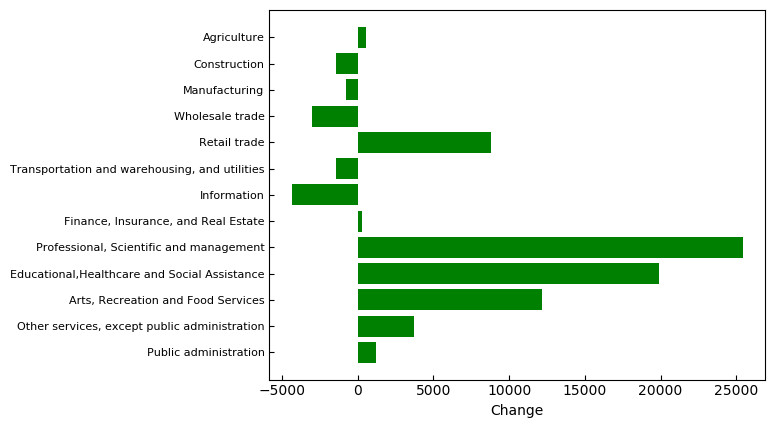

In [28]:
plt.show()

In [29]:
import cenpy as c
import pandas

ImportError: No module named 'cenpy'